In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
powerball = pd.read_csv('powerball.csv')

In [4]:
powerball_winners = powerball['powerball_winners'].value_counts().reset_index(name='count').query('powerball_winners > 0')
powerball_winners.reset_index(drop=True, inplace=True)
powerball_winners

,powerball_winners,count
0,1,209
1,2,8
2,3,5


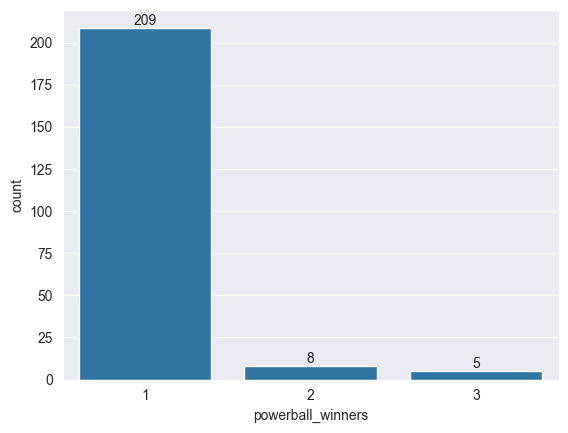

In [5]:
sns.barplot(data=powerball_winners, x='powerball_winners', y='count')
for index, row in powerball_winners.iterrows():
    plt.text(index, row['count'], row['count'], ha='center', va='bottom')

In [6]:
# get powerball with powerball winners > 0
powerball_winners = powerball[powerball['powerball_winners'] > 0]
powerball_winners

,date,numbers,powerball_winners,powerball_price,winner_location
10,2004-05-08,"['3', '9', '17', '37', '43', '39']",1,$110.2 MILLION,PA
16,2004-05-29,"['1', '16', '30', '32', '39', '2']",1,$26.9 MILLION,PA
24,2004-06-26,"['9', '17', '32', '41', '47', '8']",1,$34.2 MILLION,SC
27,2004-07-07,"['18', '25', '30', '34', '41', '10']",1,$11.1 MILLION,MN
38,2004-08-14,"['4', '10', '11', '18', '43', '41']",1,$53.1 MILLION,MN
...,...,...,...,...,...
2297,2024-12-07,"['1', '31', '43', '55', '57', '22']",1,$123.5 MILLION,NY
2304,2024-12-23,"['1', '12', '14', '18', '69', '2']",1,$77.3 MILLION,KY
2315,2025-01-18,"['14', '31', '35', '64', '69', '23']",1,$146.4 MILLION,OR
2345,2025-03-29,"['7', '11', '21', '53', '61', '2']",1,$243.8 MILLION,CA


In [7]:
# split powerball state to new row, divide powerball_winners by number of states, convert powerball_price to number and divide by number of states
powerball_winners_split = powerball_winners.assign(
    powerball_winners=powerball_winners['powerball_winners'] / powerball_winners['winner_location'].str.split(',').str.len(),
    powerball_price=powerball_winners['powerball_price'].str.replace('$', '').str.replace('MILLION', '').astype(float) / powerball_winners['winner_location'].str.split(',').str.len(),
    winner_location=powerball_winners['winner_location'].str.split(',')
).explode('winner_location')
powerball_winners_split

,date,numbers,powerball_winners,powerball_price,winner_location
10,2004-05-08,"['3', '9', '17', '37', '43', '39']",1.0,110.2,PA
16,2004-05-29,"['1', '16', '30', '32', '39', '2']",1.0,26.9,PA
24,2004-06-26,"['9', '17', '32', '41', '47', '8']",1.0,34.2,SC
27,2004-07-07,"['18', '25', '30', '34', '41', '10']",1.0,11.1,MN
38,2004-08-14,"['4', '10', '11', '18', '43', '41']",1.0,53.1,MN
...,...,...,...,...,...
2297,2024-12-07,"['1', '31', '43', '55', '57', '22']",1.0,123.5,NY
2304,2024-12-23,"['1', '12', '14', '18', '69', '2']",1.0,77.3,KY
2315,2025-01-18,"['14', '31', '35', '64', '69', '23']",1.0,146.4,OR
2345,2025-03-29,"['7', '11', '21', '53', '61', '2']",1.0,243.8,CA


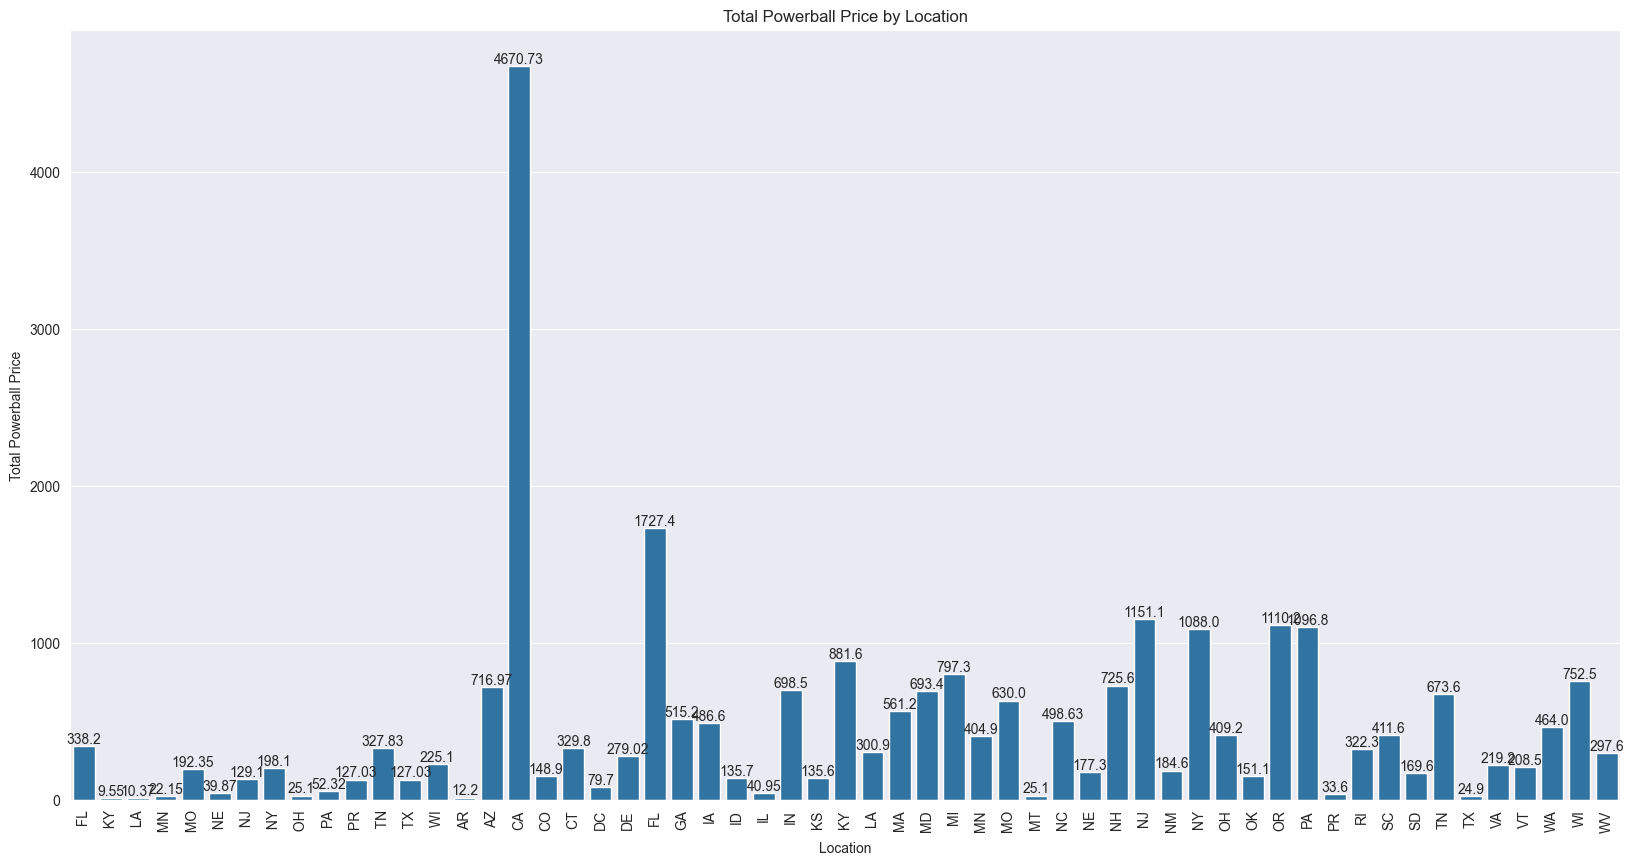

In [9]:
# group by winner_location and sum powerball_price
winner_location_grouped = powerball_winners_split.groupby('winner_location', as_index=False).agg({'powerball_price': 'sum', 'powerball_winners': 'sum'})

# use sns to draw chart by winner_location and powerball_price
plt.figure(figsize=(20, 10))

sns.barplot(data=winner_location_grouped, x='winner_location', y='powerball_price')
plt.xticks(rotation=90)
for index, row in winner_location_grouped.iterrows():
    plt.text(index, row['powerball_price'], round(row['powerball_price'], 2), ha='center', va='bottom')

plt.title('Total Powerball Price by Location')
plt.xlabel('Location')
plt.ylabel('Total Powerball Price')
plt.show()

In [10]:
winner_location_grouped

,winner_location,powerball_price,powerball_winners
0,FL,338.200000,2.0
1,KY,9.550000,1.0
2,LA,10.366667,1.0
3,MN,22.150000,1.0
4,MO,192.350000,1.0
5,NE,39.866667,2.0
6,NJ,129.100000,1.5
7,NY,198.100000,1.0
8,OH,25.100000,1.0
9,PA,52.316667,2.0


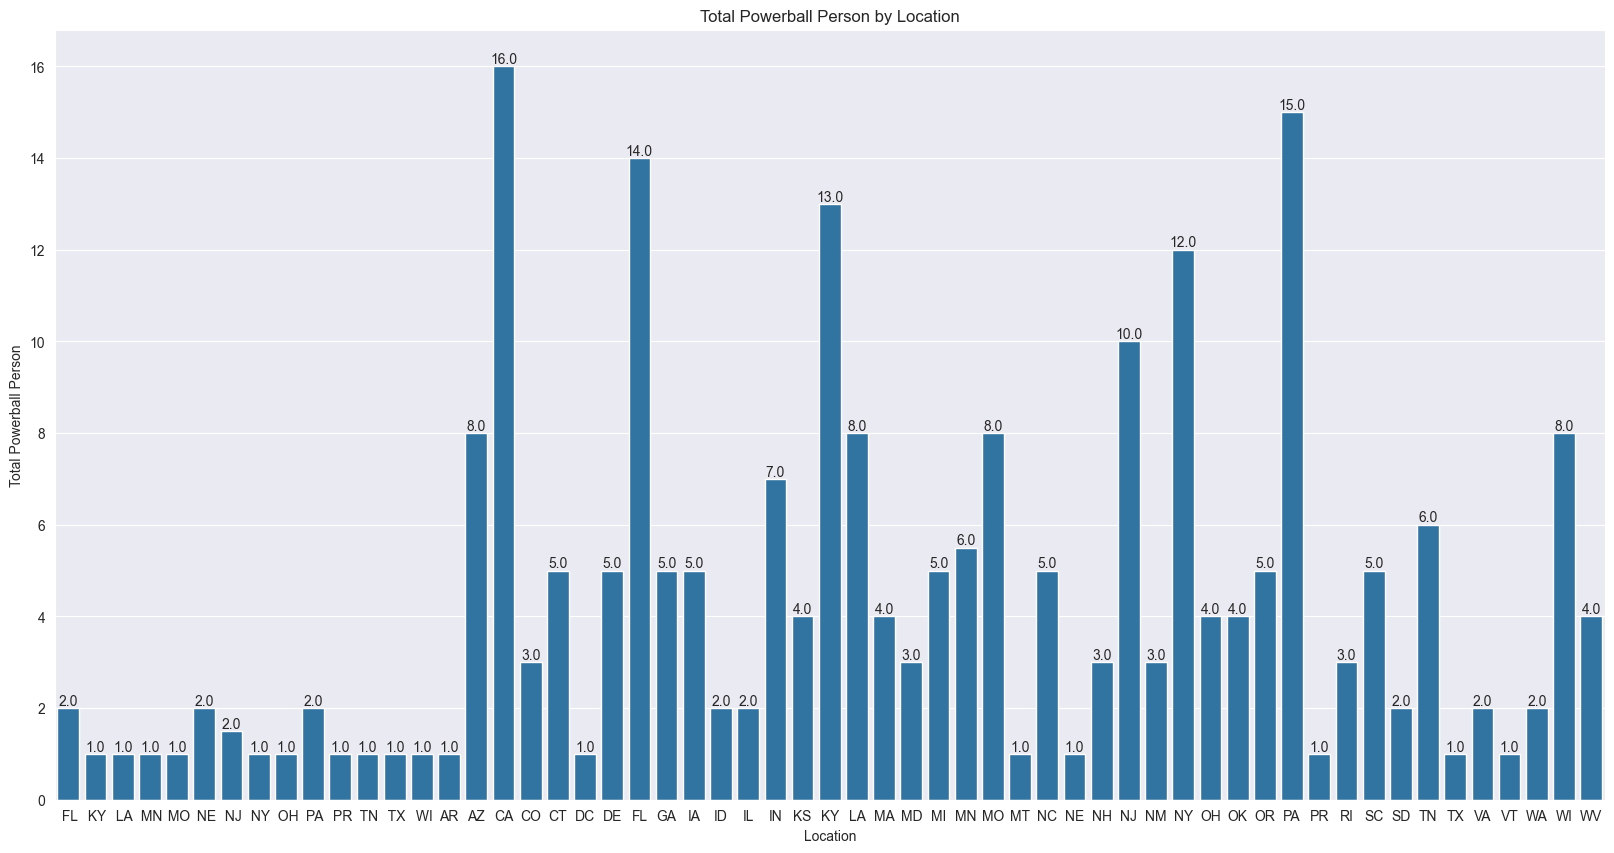

In [11]:
# use sns to draw chart by winner_location and powerball_price
plt.figure(figsize=(20, 10))

sns.barplot(data=winner_location_grouped, x='winner_location', y='powerball_winners')
for index, row in winner_location_grouped.iterrows():
    plt.text(index, row['powerball_winners'], round(row['powerball_winners'], 0), ha='center', va='bottom')

plt.title('Total Powerball Person by Location')
plt.xlabel('Location')
plt.ylabel('Total Powerball Person')
plt.show()

In [177]:
# Parse 'numbers' from string to real list
import ast
powerball['numbers'] = powerball['numbers'].apply(lambda x: [int(n) for n in ast.literal_eval(x)])
# Flatten all numbers into one big list
all_numbers = [num for sublist in powerball['numbers'] for num in sublist]

In [178]:
# Count frequency
from typing import Counter
number_counter = Counter(all_numbers)

In [179]:
# Convert to DataFrame if you want
number_df = pd.DataFrame(number_counter.items(), columns=['number', 'count']).sort_values(by='count', ascending=False)

In [186]:
number_df

,number,count
33,23,291
47,12,284
43,14,281
17,20,281
49,18,281
...,...,...
67,67,89
59,68,87
66,66,87
62,60,77


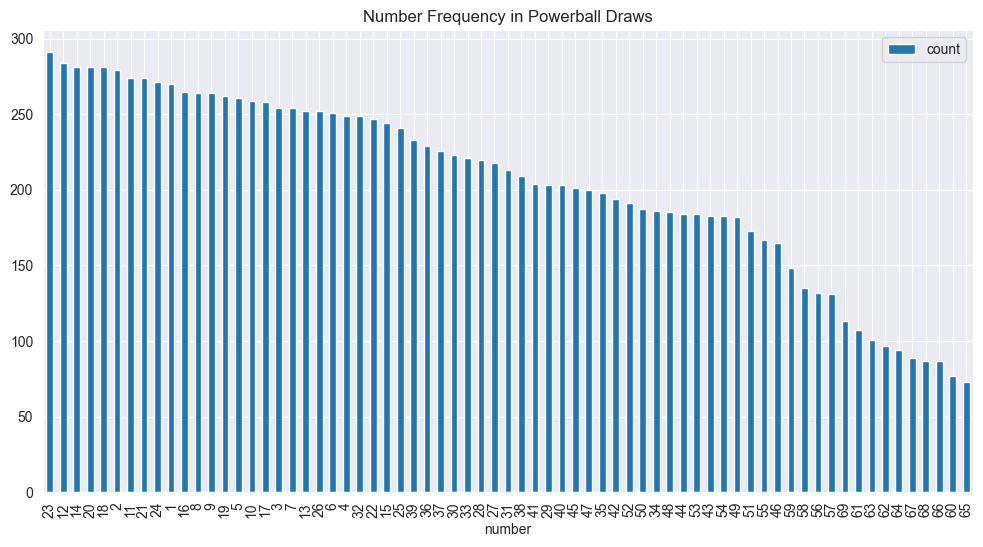

In [180]:
number_df.plot.bar(x='number', y='count', figsize=(12,6))
plt.title('Number Frequency in Powerball Draws')
plt.show()